***Here We're Going to make a Prediction modal of Grocery Store***

***Here we're importing all libraries which will help me to train my modal***

In [4]:
#The import numpy portion of the code tells Python to bring the NumPy library into your current environment
import numpy as np
#The import pandas portion of the code tells Python to bring the pandas data analysis library into your current environment.
import pandas as pd
#Matplotlib is use for data visualization and graphical plotting library for Python and its numerical extension NumPy
import matplotlib.pyplot as plt
#It is used for data visualization and exploratory data analysis.The graphs created can also be customized easily
import seaborn as sns
#LabelEncoder can be used to normalize label
from sklearn.preprocessing import LabelEncoder
#train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data
from sklearn.model_selection import train_test_split
#I will use for the dataset
from xgboost import XGBRegressor
#This metrics implements functions assessing prediction error for specific purposes.
from sklearn import metrics

***Now, Below I will do Data Collecting and Processing***

In [48]:
pwd

'/content'

In [22]:
grocery_data = pd.read_csv('/content/sample_data/Groceries_dataset.csv')

***I use .head function with passing '20' parameter for showing data till 20 entries***

In [30]:
grocery_data.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


I use .shape **It tell us that there are 38765 rows and 3 columns in our dataset**

In [31]:
grocery_data.shape

(38765, 3)

***It will give us information of our data set***

In [32]:
grocery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


***It will tell us is there any entry is null or not in dataset coloumns***

In [33]:
grocery_data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

***we have Member_number column in our dataset we caculation mean of that coloumn in dataset***

In [34]:
grocery_data['Member_number'].mean()

3003.64186766413

***we have use this, if any entry by chance is missing then fill  that entry***

In [35]:
grocery_data['Member_number'].fillna(grocery_data['Member_number'].mean(), inplace = True)

***we checking for any entry is missing or not in the coloumn of Member_number dataset***

In [36]:
missing_value = grocery_data['Member_number'].isnull()

***Here I want to see the table for confirmation, any value missing or not***

In [37]:
print(missing_value)

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Name: Member_number, Length: 38765, dtype: bool


***It will describe all details of dataset***

In [38]:
grocery_data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


***Here we call the seaborn library for ploting and figuring graphs***

In [39]:
sns.set()

***First I've set thesize of graph then I've said plot a graph of coloumn which is Member_number of dataset***

**The plot you can see below**

<Figure size 432x432 with 0 Axes>

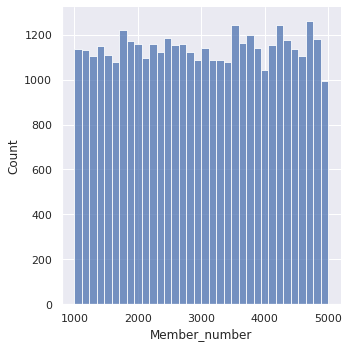

In [40]:
#Member_number Distribution
plt.figure(figsize=(6,6))
sns.displot(grocery_data['Member_number'])
plt.show()


***I've set the size of graph then I've said plot a graph of coloumn which is itemDescription of dataset***

**The plot you can see below**

<Figure size 1080x432 with 0 Axes>

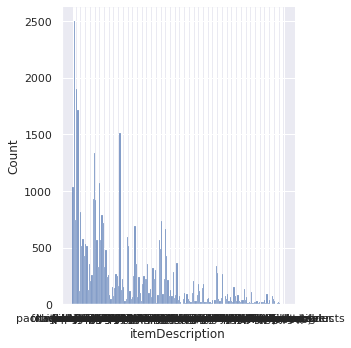

In [51]:
#item_Description Distribution
plt.figure(figsize=(15,6))
sns.displot(grocery_data['itemDescription'])
plt.show()

***I've set the size of graph then I've said plot a graph of coloumn which is Date of dataset***

**The plot you can see below**

<Figure size 432x432 with 0 Axes>

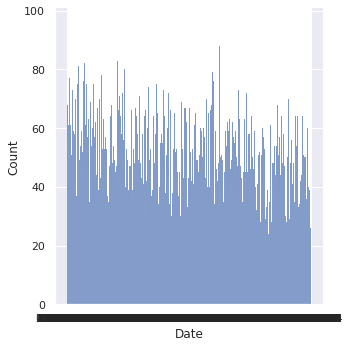

In [42]:
#Date Distribution
plt.figure(figsize=(6,6))
sns.displot(grocery_data['Date'])
plt.show()

***First I've set the size of graph then I've said count a graph of coloumn which is itemDescription of dataset***

***The plot you can see below***

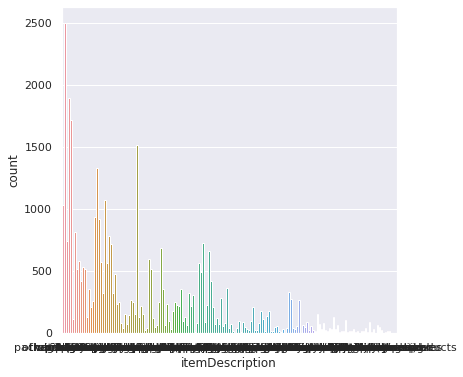

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='itemDescription', data=grocery_data)
plt.show()


***First I've set the size of graph then I've said count a graph of coloumn which is Member_number of dataset***

***The plot you can see below***

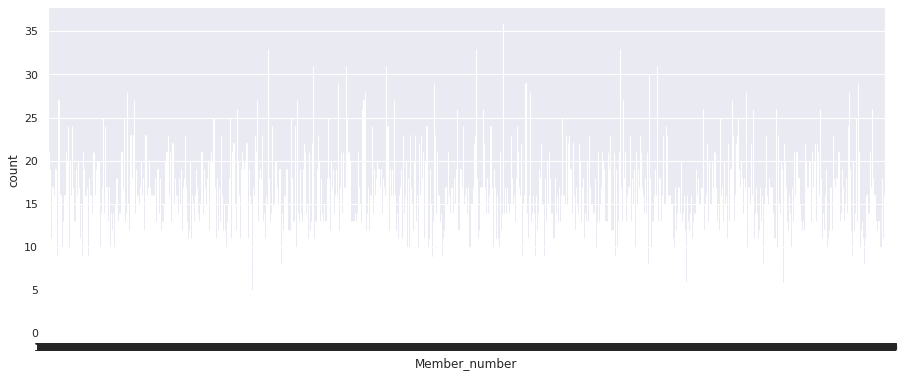

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x='Member_number', data=grocery_data)
plt.show()

***First I've set the size of graph then I've said count a graph of coloumn which is Date of dataset***

***The plot you can see below***

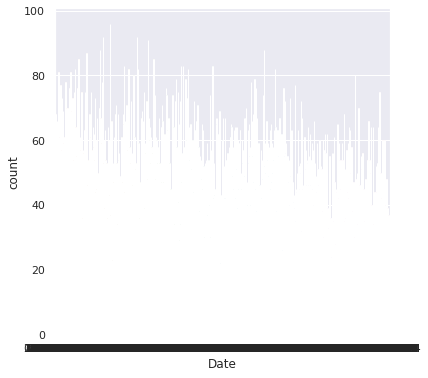

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(x='Date', data=grocery_data)
plt.show()

***Again I want to 20 first 20 entries of dataset that's why I called .head again***

In [53]:
grocery_data.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


***Here I'm counting the values of Member_number coloumn of dataset Groceries***

In [54]:
grocery_data['Member_number'].value_counts()

3180    36
3050    33
2051    33
3737    33
2433    31
        ..
4565     2
2373     2
3788     2
2614     2
2844     2
Name: Member_number, Length: 3898, dtype: int64

***Here I'm counting the values of itemDescription coloumn of dataset Groceries***

In [55]:
grocery_data['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

***Here I've changed some values of coloumn itemDescription with my name Mirza Yaseen and my group parter name Waqas ***

In [58]:
grocery_data.replace({'itemDescription':{'whole milk':'Mirza Yaseen','other vegetables':'Waqas','rolls/buns':'Doctor Yaseen','soda':'Doctor Waqas','yogurt':'Engineer Yaseen','toilet cleaner':'Engineer Waqas'}}, inplace =True)

***Here I'm see the changed values of itemDescription column***

In [59]:
grocery_data['itemDescription'].value_counts()

Mirza Yaseen             2502
Waqas                    1898
Doctor Yaseen            1716
Doctor Waqas             1514
Engineer Yaseen          1334
                         ... 
Engineer Waqas              5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

***Here we are going to use Label Encoding***

In [60]:
encoder = LabelEncoder()

***We have maintaining the fitness of every coloumn of our dataset here***

In [61]:
grocery_data['itemDescription'] = encoder.fit_transform(grocery_data['itemDescription'])

grocery_data['Member_number'] = encoder.fit_transform(grocery_data['Member_number'])

grocery_data['Date'] = encoder.fit_transform(grocery_data['Date'])

***For Checking fitness we've again call .head***

In [63]:
grocery_data.head(20)

,Member_number,Date,itemDescription
0,786,493,158
1,1504,97,5
2,1263,449,114
3,180,287,7
4,1981,3,5
5,3838,315,1
6,3406,177,7
7,2731,551,117
8,1711,461,5
9,3036,267,158


***Here we're Splitting features and Target***

In [65]:
Yaseen = grocery_data.drop(columns='itemDescription', axis=1)
Waqas = grocery_data['itemDescription']

In [66]:
print(Yaseen)

       Member_number  Date
0                786   493
1               1504    97
2               1263   449
3                180   287
4               1981     3
...              ...   ...
38760           3377   186
38761            997   530
38762             93   366
38763            499    70
38764            510   622

[38765 rows x 2 columns]


In [67]:
print(Waqas)

0        158
1          5
2        114
3          7
4          5
        ... 
38760    139
38761     25
38762     23
38763     70
38764     30
Name: itemDescription, Length: 38765, dtype: int64


***Splitting the data into Training data & Testing Data***

In [68]:
Yaseen_train, Yaseen_test, Waqas_train, Waqas_test = train_test_split(Yaseen, Waqas, test_size=0.2, random_state=2)

***We are checking the shape of dataset***

In [69]:
print(Yaseen.shape, Yaseen_train.shape, Yaseen_test.shape)

(38765, 2) (31012, 2) (7753, 2)


***We are checking the shape of dataset***

In [70]:
print(Waqas.shape, Waqas_train.shape, Waqas_test.shape)

(38765,) (31012,) (7753,)


***Here we're going tod o Machine Learning Model Training***

***By XGBoost Regressor***

In [71]:
regressor = XGBRegressor()

In [72]:
regressor.fit(Yaseen_train, Waqas_train)

[20:41:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

***After putting this effort we're going to Evaluate***

In [73]:
# prediction on training data
training_data_prediction = regressor.predict(Yaseen_train)

In [76]:
# R squared Value
r2_train = metrics.r2_score(Waqas_train, training_data_prediction)

In [77]:
print('R Squared value = ', r2_train)

R Squared value =  0.01270173625600124


In [78]:
# prediction on test data
test_data_prediction = regressor.predict(Yaseen_test)

In [79]:
# R squared Value
r2_test = metrics.r2_score(Waqas_test, test_data_prediction)

In [80]:
print('R Squared value = ', r2_test)

R Squared value =  -0.004073530843141437
